In [1]:
import sys #only needed to determine Python version number
import matplotlib as mpl
import warnings

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy import stats

import statsmodels.api as sm

#import re    # regular expressions

In [2]:
print('Environment \n----------------------------------------------------------------------------------------------')
print('Python: version ' + sys.version)
print('Pandas: version ' + pd.__version__)
print('Matplotlib: version ' + mpl.__version__)

Environment 
----------------------------------------------------------------------------------------------
Python: version 3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]
Pandas: version 0.25.0
Matplotlib: version 3.0.2


In [3]:
# Environment
warnings.filterwarnings("ignore")

# Pandas configuration
#pd.set_option('display.max_row', 20)
pd.set_option('precision', 4)

# Plot configuration
plt.figure(figsize=(16, 6))
plt.style.use('fivethirtyeight')

# Seaborn configuration
sns.set(color_codes=True)

# Enable inline plotting
%matplotlib inline

mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.titleweight'] = 14
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['figure.figsize'] = 11.7,8.27
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'

In [4]:
# Loading yearly events
df_events = pd.read_csv("2019EventsVLC.csv", sep=';', encoding='utf-8', header=0, na_values=['NA'])

In [5]:
df_events.head()

,Date,Event,Place,City,Category,Subcategory
0,15/06/2019,Marea,Auditorio Marina Sur,Valencia,Musica,NaN
1,22/06/2019,Taburete,Auditorio Marina Sur,Valencia,Musica,NaN
2,29/06/2019,Vanesa Martín,Plaza de Toros,Valencia,Musica,NaN
3,29/06/2019,Operación Triunfo – Gira OT,Auditorio Marina Sur,Valencia,Musica,NaN
4,30/06/2019,David Bisbal,Conciertos de Viveros,Valencia,Musica,NaN


In [6]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 6 columns):
Date           171 non-null object
Event          171 non-null object
Place          171 non-null object
City           171 non-null object
Category       171 non-null object
Subcategory    56 non-null object
dtypes: object(6)
memory usage: 8.1+ KB


In [7]:
df_events['Date'] = pd.to_datetime(df_events['Date'])
# Converting Category to categorical
df_events['Category'] = df_events.Category.astype('category')

In [8]:
df_events.Category.unique().tolist()

['Musica', 'Feria', 'Deporte', 'Congreso']

## Properties

In [287]:
# Loading properties to a data frame from csv file 
df_prop1 = pd.read_csv("PropertiesVLC.csv", sep=';', encoding='utf-8', header=0, na_values=['NA'])

In [288]:
# Check for null values in the dataset
print(df_prop1.isnull().sum())

propertyId      0
propertyType    0
district        0
coords          0
dtype: int64


In [289]:
df_prop1.head()

,propertyId,propertyType,district,coords
0,12656,Hotel,"Poblados marítimos, Valencia","-0.323789566755295,39.4650841913551"
1,13270,Hotel,"Ciutat Vella, Valencia","-0.376952290534973,39.4710278753057"
2,14441,Hotel,"Campanar, Valencia","-0.388724505901337,39.4802276264005"
3,14580,Hotel,"Poblados marítimos, Valencia","-0.323579013347626,39.4637061283809"
4,17344,Apartahotel,"Benicalap, Valencia","-0.400978177785873,39.4935991016437"


In [290]:
print("Shape of data: {}".format(df_prop1.shape))

Shape of data: (760, 4)


In [292]:
# Eliminate rows with propertyType null
df_prop1 = df_prop1[pd.notnull(df_prop1['propertyType'])]

In [293]:
print("Shape of data: {}".format(df_prop1.shape))

Shape of data: (760, 4)


In [294]:
df_prop1.sort_values("propertyId", inplace = True)

In [295]:
df_prop1.head(10)

,propertyId,propertyType,district,coords
0,12656,Hotel,"Poblados marítimos, Valencia","-0.323789566755295,39.4650841913551"
1,13270,Hotel,"Ciutat Vella, Valencia","-0.376952290534973,39.4710278753057"
2,14441,Hotel,"Campanar, Valencia","-0.388724505901337,39.4802276264005"
3,14580,Hotel,"Poblados marítimos, Valencia","-0.323579013347626,39.4637061283809"
4,17344,Apartahotel,"Benicalap, Valencia","-0.400978177785873,39.4935991016437"
5,17468,Apartamentos,"Ciutat Vella, Valencia","-0.375876724720001,39.47885710935"
6,18544,Apartamentos,"Extramurs, Valencia","-0.385724455118179,39.4721035025734"
7,23332,Hotel,"Poblados marítimos, Valencia","-0.323690325021744,39.4642807560034"
8,24498,Hotel,"Poblados marítimos, Valencia","-0.323730558156967,39.4647808334785"
9,25278,Albergue,"Ciutat Vella, Valencia","-0.369946360588074,39.4746625797156"


In [296]:
df_prop1['district'] = df_prop1['district'].str.strip()
df_prop1[['longitude','latitude']] = df_prop1.coords.str.split(',',expand=True)
df_prop1[['tmpDistrict','locality']] = df_prop1.district.str.split(',',expand=True)

In [297]:
df_prop1.drop(columns=['district', 'coords', 'locality'], inplace = True)

In [298]:
df_prop1.rename(columns={'tmpDistrict': 'district'}, inplace = True)

In [299]:
# Converting propertyType to categorical
df_prop1['propertyType'] = df_prop1.propertyType.astype('category')

In [300]:
df_prop1.propertyType.unique().tolist()

['Hotel',
 'Apartahotel',
 'Apartamentos',
 'Albergue',
 'Apartamento',
 'Hostal o pensión',
 'Bed & breakfast',
 'Residencia de estudiantes',
 'Casa o chalet',
 'Habitación en casa particular',
 'Casas y chalets',
 'Tented camp',
 'Barco',
 'Camping']

In [301]:
df_prop1['propertyType'] = df_prop1['propertyType'].replace('Apartamentos','Apartamento')
df_prop1['propertyType'] = df_prop1['propertyType'].replace('Casa o chalet','Casa/Chalet')
df_prop1['propertyType'] = df_prop1['propertyType'].replace('Casas y chalets','Casa/Chalet')
df_prop1['propertyType'] = df_prop1['propertyType'].replace('Apartahotel','ApartHotel')
df_prop1['propertyType'] = df_prop1['propertyType'].replace('Bed & breakfast','B&B')
df_prop1['propertyType'] = df_prop1['propertyType'].replace('Habitación en casa particular','Habitacion')
df_prop1['propertyType'] = df_prop1['propertyType'].replace('Residencia de estudiantes','Residencia')
df_prop1['propertyType'] = df_prop1['propertyType'].replace('Hostal o pensión','Hostal/Pension')

In [302]:
df_prop1.propertyType.unique().tolist()

['Hotel',
 'ApartHotel',
 'Apartamento',
 'Albergue',
 'Hostal/Pension',
 'B&B',
 'Residencia',
 'Casa/Chalet',
 'Habitacion',
 'Tented camp',
 'Barco',
 'Camping']

In [303]:
df_prop1.set_index('propertyId', inplace = True)

In [304]:
df_prop1.head()

,propertyType,longitude,latitude,district
propertyId,,,,
12656,Hotel,-0.323789566755295,39.4650841913551,Poblados marítimos
13270,Hotel,-0.376952290534973,39.4710278753057,Ciutat Vella
14441,Hotel,-0.388724505901337,39.4802276264005,Campanar
14580,Hotel,-0.323579013347626,39.4637061283809,Poblados marítimos
17344,ApartHotel,-0.400978177785873,39.4935991016437,Benicalap


In [152]:
#df_prop_1.drop(columns=['name'], inplace=True)

In [305]:
# dropping ALL duplicated values except first occurrence
df_prop1.drop_duplicates(keep = 'first', inplace = True) 

In [306]:
# Districts
district_names = np.sort(df_prop1.district.unique().tolist())
district_names

array(['Algirós', 'Benicalap', 'Benimaclet', 'Camins al Grau', 'Campanar',
       'Ciutat Vella', 'Eixample', 'El Pla del Real', 'Extramurs',
       'Jesús', 'La Saïdia', 'Olivereta', 'Patraix',
       'Playa de la Malvarrosa', 'Poblados marítimos', 'Quatre Carreres',
       'Rascanya', 'Valencia'], dtype='<U22')

In [307]:
# Check for null values in the dataset
print(df_prop1.isnull().sum())

propertyType    0
longitude       0
latitude        0
district        0
dtype: int64


In [156]:
#df_prop1[df_prop1['propertyType'].isnull()]

## Prices

In [308]:
# making data frame from csv file 
lst_hotels = []
def concatFiles(folder):
    for file in os.listdir(folder):
        filename = os.path.join(folder, file) 
        print('Reading file <' + os.path.basename(filename) + '>')
        df_temp = pd.read_csv(filename, sep=',', encoding='utf-8', \
                       header=0, parse_dates=['checkIn','checkOut'], dayfirst=False, na_values=['NA'])
        #df['filename'] = os.path.basename(filename)
        lst_hotels.append(df_temp)
 
concatFiles(".\\data\\")

Reading file <20190722_225212_Booking_Valencia_7.csv>
Reading file <20190722_225230_Booking_Valencia_14.csv>
Reading file <20190722_225248_Booking_Valencia_30.csv>
Reading file <20190722_225302_Booking_Valencia_60.csv>
Reading file <20190722_225315_Booking_Valencia_90.csv>
Reading file <20190723_212717_Booking_Valencia_7.csv>
Reading file <20190723_212756_Booking_Valencia_14.csv>
Reading file <20190723_212809_Booking_Valencia_30.csv>
Reading file <20190723_212901_Booking_Valencia_60.csv>
Reading file <20190723_212917_Booking_Valencia_90.csv>
Reading file <20190724_092126_Booking_Valencia_7.csv>
Reading file <20190724_092145_Booking_Valencia_14.csv>
Reading file <20190724_092208_Booking_Valencia_30.csv>
Reading file <20190724_092244_Booking_Valencia_60.csv>
Reading file <20190724_092306_Booking_Valencia_90.csv>
Reading file <20190725_124219_Booking_Valencia_7.csv>
Reading file <20190725_124243_Booking_Valencia_14.csv>
Reading file <20190725_160420_Booking_Valencia_30.csv>
Reading file <

Reading file <20190826_133446_Booking_Valencia_14.csv>
Reading file <20190826_133459_Booking_Valencia_30.csv>
Reading file <20190826_133510_Booking_Valencia_60.csv>
Reading file <20190826_133524_Booking_Valencia_90.csv>
Reading file <20190827_111453_Booking_Valencia_7.csv>
Reading file <20190827_111507_Booking_Valencia_14.csv>
Reading file <20190827_111520_Booking_Valencia_30.csv>
Reading file <20190827_111530_Booking_Valencia_60.csv>
Reading file <20190827_111545_Booking_Valencia_90.csv>
Reading file <20190828_081950_Booking_Valencia_7.csv>
Reading file <20190828_082003_Booking_Valencia_14.csv>
Reading file <20190828_082015_Booking_Valencia_60.csv>
Reading file <20190828_082028_Booking_Valencia_30.csv>
Reading file <20190828_082043_Booking_Valencia_90.csv>
Reading file <20190829_114228_Booking_Valencia_7.csv>
Reading file <20190829_114241_Booking_Valencia_14.csv>
Reading file <20190829_114253_Booking_Valencia_30.csv>
Reading file <20190829_114307_Booking_Valencia_60.csv>
Reading file 

In [309]:
df_prop2 = pd.concat(lst_hotels, axis=0, ignore_index=True)
print("Shape of data: {}".format(df_prop2.shape))

Shape of data: (83330, 12)


In [310]:
# Preview the last 5 lines of loaded data 
df_prop2.tail(5)

,name,propertyId,propertyType,city,rooms,days,price,checkIn,checkOut,stars,score,advance
83325,Kirei Apartment Portland,4276529,Apartamentos,Valencia,1,1,€ 200,2019-12-06,2019-12-07,0,"5,9",90
83326,Port of Valencia,3805735,Apartamento,Valencia,1,1,€ 150,2019-12-06,2019-12-07,0,"4,9",90
83327,Malvarosa,3820590,Apartamento,Valencia,1,1,€ 190,2019-12-06,2019-12-07,0,"4,1",90
83328,Aventura,5567318,Apartamentos,Valencia,1,1,€ 40,2019-12-06,2019-12-07,0,NaN,90
83329,Como en casa !!,5427108,NaN,Valencia,1,1,€ 40,2019-12-06,2019-12-07,0,NaN,90


### Cleaning data

In [311]:
# Checking for null values in the dataset
print(df_prop2.isnull().sum())

name                0
propertyId          0
propertyType    41755
city                0
rooms               0
days                0
price            9147
checkIn             0
checkOut            0
stars               0
score            5898
advance             0
dtype: int64


In [312]:
# Eliminating rows without price
df_prop2 = df_prop2[pd.notnull(df_prop2['price'])]

In [313]:
print("Shape of data: {}".format(df_prop2.shape))

Shape of data: (74183, 12)


In [271]:
# Assigning correct value to 'propertyType' based on 'name'
# df_prop2.loc[df_prop2['name'].str.contains('Apartament'), 'propertyType'] = 'Apartamento'
# df_prop2.loc[df_prop2['name'].str.contains('Apartment'), 'propertyType'] = 'Apartamento'
# df_prop2.loc[df_prop2['name'].str.contains('Flats'), 'propertyType'] = 'Apartamento'
# df_prop2.loc[df_prop2['name'].str.contains('flats'), 'propertyType'] = 'Apartamento'
# df_prop2.loc[df_prop2['name'].str.contains('Rentals'), 'propertyType'] = 'Apartamento'
# df_prop2.loc[df_prop2['name'].str.contains('rentals'), 'propertyType'] = 'Apartamento'
# df_prop2.loc[df_prop2['name'].str.contains('Hostal'), 'propertyType'] = 'Hostal/Pension'

In [314]:
# Checking for null values in the dataset
print(df_prop2.isnull().sum())

name                0
propertyId          0
propertyType    39393
city                0
rooms               0
days                0
price               0
checkIn             0
checkOut            0
stars               0
score            5867
advance             0
dtype: int64


In [273]:
#df_prop_2.reset_index()
# the check-in column is set as index column
#df_prop_2.set_index('propertyId', inplace = True)
#hotels_df.set_index('checkIn', inplace = True)

### Splitting columns

In [315]:
df_prop2[['currency','netPrice']] = df_prop2.price.str.split(expand=True) 

In [316]:
df_prop2.head(5)

,name,propertyId,propertyType,city,rooms,days,price,checkIn,checkOut,stars,score,advance,currency,netPrice
0,Lotelito,570027,Hotel,Valencia,1,1,€ 89,2019-07-29,2019-07-30,0,"8,9",7,€,89
1,Miresa flats,5300418,Apartamento,Valencia,1,1,€ 125,2019-07-29,2019-07-30,0,NaN,7,€,125
3,MYR Hotel Plaza Mercado & Spa,1619029,Apartahotel,Valencia,1,1,€ 124,2019-07-29,2019-07-30,0,"9,2",7,€,124
4,Miresa flats 2.1A,5399747,Apartamento,Valencia,1,1,€ 90,2019-07-29,2019-07-30,0,NaN,7,€,90
5,Catedral Reina Apartaments,5348651,Apartamentos,Valencia,1,1,€ 140,2019-07-29,2019-07-30,0,NaN,7,€,140


### Dropping columns

In [317]:
# Deleting propertyTpe because its in df_prop1
df_prop2.drop(columns=['propertyType', 'city', 'rooms', 'days', 'price', 'currency'], inplace=True)

In [318]:
df_prop2.head(5)

,name,propertyId,checkIn,checkOut,stars,score,advance,netPrice
0,Lotelito,570027,2019-07-29,2019-07-30,0,"8,9",7,89
1,Miresa flats,5300418,2019-07-29,2019-07-30,0,NaN,7,125
3,MYR Hotel Plaza Mercado & Spa,1619029,2019-07-29,2019-07-30,0,"9,2",7,124
4,Miresa flats 2.1A,5399747,2019-07-29,2019-07-30,0,NaN,7,90
5,Catedral Reina Apartaments,5348651,2019-07-29,2019-07-30,0,NaN,7,140


### Casting data

In [319]:
# Casting Price to float
df_prop2['netPrice'] = df_prop2.netPrice.astype('float32')

In [320]:
# Casting stars to object
df_prop2['stars'] = df_prop2.stars.astype('str')

In [321]:
df_prop2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74183 entries, 0 to 83329
Data columns (total 8 columns):
name          74183 non-null object
propertyId    74183 non-null int64
checkIn       74183 non-null datetime64[ns]
checkOut      74183 non-null datetime64[ns]
stars         74183 non-null object
score         68316 non-null object
advance       74183 non-null int64
netPrice      74183 non-null float32
dtypes: datetime64[ns](2), float32(1), int64(2), object(3)
memory usage: 4.8+ MB


In [322]:
# Decoding number of stars
df_prop2['stars'] = df_prop2['stars'].replace('0', 'Non star')
df_prop2['stars'] = df_prop2['stars'].replace('1', '1 star')
df_prop2['stars'] = df_prop2['stars'].replace('2', '2 star')
df_prop2['stars'] = df_prop2['stars'].replace('3', '3 star')
df_prop2['stars'] = df_prop2['stars'].replace('4', '4 star')
df_prop2['stars'] = df_prop2['stars'].replace('5', '5 star')

In [323]:
# Showing first 5 stars properties
df_prop2[df_prop2['stars']=='5 star'].head()

,name,propertyId,checkIn,checkOut,stars,score,advance,netPrice
1621,Las Arenas Balneario Resort,91144,2019-07-30,2019-07-31,5 star,9,7,297.0
1622,Caro Hotel,348132,2019-07-30,2019-07-31,5 star,"9,2",7,495.0
1716,SH Valencia Palace,91497,2019-07-30,2019-07-31,5 star,"8,5",7,135.0
1773,Hospes Palau de La Mar,93823,2019-07-30,2019-07-31,5 star,"8,8",7,212.0
1778,The Westin Valencia,93321,2019-07-30,2019-07-31,5 star,"8,7",7,213.0


In [324]:
# Casting stars object to categorical
df_prop2['stars'] = df_prop2.stars.astype('category')

In [325]:
# Casting score object to numeric
df_prop2['score'] = df_prop2['score'].str.replace(',','.')
df_prop2['score'] = pd.to_numeric(df_prop2['score']).round(1)

In [326]:
# Scores values
np.sort(df_prop2.score.unique())

array([ 3.3,  3.4,  3.5,  3.8,  3.9,  4. ,  4.1,  4.5,  4.6,  4.7,  4.8,
        4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9,
        6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,  7. ,
        7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,  8. ,  8.1,
        8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  8.9,  9. ,  9.1,  9.2,
        9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9, 10. ,  nan])

### Merging data

In [327]:
# Merging hotel data + property data (district, latitude, longitude, propertyType)
df_properties = pd.merge(df_prop2, df_prop1, on='propertyId', how='outer')

In [328]:
df_properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74291 entries, 0 to 74290
Data columns (total 12 columns):
name            74183 non-null object
propertyId      74291 non-null int64
checkIn         74183 non-null datetime64[ns]
checkOut        74183 non-null datetime64[ns]
stars           74183 non-null category
score           68316 non-null float64
advance         74183 non-null float64
netPrice        74183 non-null float32
propertyType    68725 non-null object
longitude       68725 non-null object
latitude        68725 non-null object
district        68725 non-null object
dtypes: category(1), datetime64[ns](2), float32(1), float64(2), int64(1), object(5)
memory usage: 6.6+ MB


In [329]:
df_properties.head()

,name,propertyId,checkIn,checkOut,stars,score,advance,netPrice,propertyType,longitude,latitude,district
0,Lotelito,570027,2019-07-29,2019-07-30,Non star,8.9,7.0,89.0,Hostal/Pension,-0.374675095081329,39.4706562158203,Ciutat Vella
1,Lotelito,570027,2019-08-21,2019-08-22,Non star,8.9,30.0,101.0,Hostal/Pension,-0.374675095081329,39.4706562158203,Ciutat Vella
2,Lotelito,570027,2019-09-20,2019-09-21,Non star,8.9,60.0,152.0,Hostal/Pension,-0.374675095081329,39.4706562158203,Ciutat Vella
3,Lotelito,570027,2019-10-20,2019-10-21,Non star,8.9,90.0,87.0,Hostal/Pension,-0.374675095081329,39.4706562158203,Ciutat Vella
4,Lotelito,570027,2019-07-30,2019-07-31,Non star,8.9,7.0,95.0,Hostal/Pension,-0.374675095081329,39.4706562158203,Ciutat Vella


### Cleaning data

In [330]:
# Checking for null values in the dataset
print(df_properties.isnull().sum())

name             108
propertyId         0
checkIn          108
checkOut         108
stars            108
score           5975
advance          108
netPrice         108
propertyType    5566
longitude       5566
latitude        5566
district        5566
dtype: int64


In [332]:
# Properties without Name
df_name_null = df_properties[df_properties['name'].isnull()]
df_name_null.propertyType.unique().tolist()

['Apartamento', 'Albergue', 'Casa/Chalet', 'Habitacion']

In [333]:
#We can delete them as we don't have hotels in this subset of data
df_properties = df_properties[pd.notnull(df_properties['name'])]

In [335]:
# Properties without Property Type
#df_propType_null = df_properties[df_properties['propertyType'].isnull()]
#df_propType_null.name.unique().tolist()
df_properties = df_properties[pd.notnull(df_properties['propertyType'])]

In [336]:
# Checking for null values in the dataset
print(df_properties.isnull().sum())

name               0
propertyId         0
checkIn            0
checkOut           0
stars              0
score           4446
advance            0
netPrice           0
propertyType       0
longitude          0
latitude           0
district           0
dtype: int64


In [337]:
# Casting longitude and latitude as float
df_properties['longitude'] = df_properties.longitude.astype('float32')
df_properties['latitude'] = df_properties.latitude.astype('float32')

In [348]:
# Converts the first character of each word to upper case
df_properties['name'] = df_properties['name'].str.title()

### Adding columns

In [349]:
df_properties['weekday'] = df_properties.checkIn.dt.weekday_name
df_properties['month'] = df_properties.checkIn.dt.strftime("%B")

### Sorting data

In [350]:
# Sorting data by propertyId and checkIn date
df_properties.sort_values(by=['propertyId','checkIn'], inplace=True)
#df_properties.sort_values(by=['propertyId'], inplace=True)

In [351]:
df_properties.head(10)

,name,propertyId,checkIn,checkOut,stars,score,advance,netPrice,propertyType,longitude,latitude,district,weekday,month
40494,Sol Playa,12656,2019-07-30,2019-07-31,2 star,8.3,7.0,85.0,Hotel,-0.3238,39.4651,Poblados marítimos,Tuesday,July
40498,Sol Playa,12656,2019-07-31,2019-08-01,2 star,8.3,7.0,85.0,Hotel,-0.3238,39.4651,Poblados marítimos,Wednesday,July
40502,Sol Playa,12656,2019-08-01,2019-08-02,2 star,8.3,7.0,103.0,Hotel,-0.3238,39.4651,Poblados marítimos,Thursday,August
40513,Sol Playa,12656,2019-08-04,2019-08-05,2 star,8.3,7.0,94.0,Hotel,-0.3238,39.4651,Poblados marítimos,Sunday,August
40503,Sol Playa,12656,2019-08-08,2019-08-09,2 star,8.3,14.0,160.0,Hotel,-0.3238,39.4651,Poblados marítimos,Thursday,August
40527,Sol Playa,12656,2019-08-08,2019-08-09,2 star,8.3,7.0,155.0,Hotel,-0.3238,39.4651,Poblados marítimos,Thursday,August
40516,Sol Playa,12656,2019-08-12,2019-08-13,2 star,8.3,14.0,100.0,Hotel,-0.3238,39.4651,Poblados marítimos,Monday,August
40542,Sol Playa,12656,2019-08-12,2019-08-13,2 star,8.3,7.0,94.0,Hotel,-0.3238,39.4651,Poblados marítimos,Monday,August
40546,Sol Playa,12656,2019-08-13,2019-08-14,2 star,8.3,7.0,132.0,Hotel,-0.3238,39.4651,Poblados marítimos,Tuesday,August
40523,Sol Playa,12656,2019-08-14,2019-08-15,2 star,8.3,14.0,141.0,Hotel,-0.3238,39.4651,Poblados marítimos,Wednesday,August


In [340]:
# Eliminate attribute name NaN
#df_properties = df_properties[pd.notnull(df_properties['name'])]
# Eliminate attribute netPrice NaN
#df_properties = df_properties[pd.notnull(df_properties['netPrice'])]

In [341]:
df_properties.drop_duplicates(keep='first', inplace=True)

In [342]:
print("Shape of data: {}".format(df_properties.shape))

Shape of data: (68212, 12)


In [343]:
#df_properties.info()

In [344]:
#df_properties.describe(include="all")
df_properties.describe()

,propertyId,score,advance,netPrice,longitude,latitude
count,6.8212e+04,63808.0000,68212.0000,68212.0000,68212.0000,68212.0000
mean,2.1820e+06,8.2702,44.2675,117.0085,-0.3724,39.4909
std,1.8013e+06,0.9502,31.3962,83.4763,0.0294,0.0266
min,1.2656e+04,3.3000,7.0000,1.0200,-0.7780,38.9126
25%,3.2492e+05,7.8000,14.0000,69.0000,-0.3804,39.4644
50%,2.0063e+06,8.4000,30.0000,99.0000,-0.3759,39.4715
75%,3.7998e+06,8.9000,60.0000,139.0000,-0.3646,39.4757
max,5.5603e+06,10.0000,90.0000,999.0000,-0.1426,39.6495


Mean Price: 119,63€  
Min Price: 1.1180 ?  
Max Price: 999 ?

In [345]:
#minPrice = df_properties['netPrice'].idxmin()
#maxPrice = df_properties['netPrice'].idxmax()

In [346]:
#print("Shape of data: {}".format(minPrice))

Shape of data: 68577


In [352]:
# Selection by position
#df_properties.loc[[minPrice]]

In [353]:
# Check for null values in the dataset
print(df_properties.isnull().sum())

name               0
propertyId         0
checkIn            0
checkOut           0
stars              0
score           4404
advance            0
netPrice           0
propertyType       0
longitude          0
latitude           0
district           0
weekday            0
month              0
dtype: int64


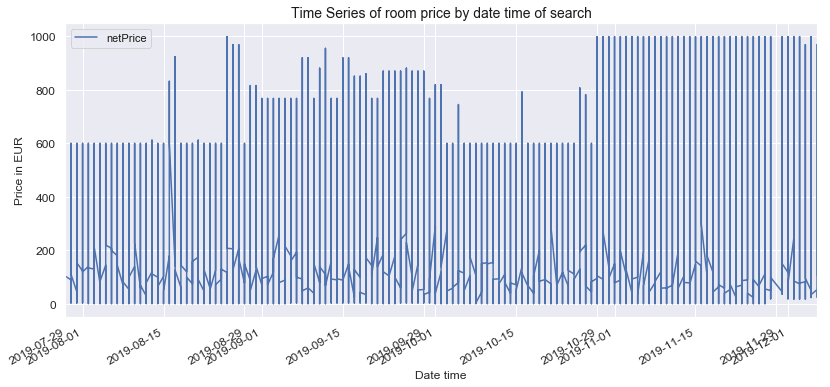

In [355]:
# Time Series Visualizations
df_properties.plot(x='checkIn', y='netPrice', figsize=(12,6))
plt.xlabel('Date time')
plt.ylabel('Price in EUR')
plt.title('Time Series of room price by date time of search');

### Hotels

In [368]:
df_hotels = df_properties.query("propertyType=='Hotel'")
print("Observations per Hotel: \n\n{}".format(df_hotels.name.value_counts()))

Observations per Hotel: 

Hotel Malcom And Barret                   228
Hotel Kramer                              227
Md Modern Hotel - Jardines                227
Vincci Palace                             225
Vincci Lys                                225
                                         ... 
Hotel Gabbeach                             85
Nest Style Valencia -Nueva Apertura-       79
Nest Style Valencia -Proxima Apertura-     69
Valencia Suits You Citytel                 36
Hotel Cosmo                                 4
Name: name, Length: 89, dtype: int64


In [379]:
print("Number of hotels analysed: {}".format(pd.unique(df_hotels.name).size))

Number of hotels analysed: 89


In [372]:
print("Number of days analysed: {}".format(pd.unique(df_hotels.checkIn).size))

Number of days analysed: 130


In [387]:
print("Range days analysed: from {} to {}".format(df_hotels.checkIn.min(), df_hotels.checkIn.max()))

Range days analysed: from 2019-07-29 00:00:00 to 2019-12-06 00:00:00


In [381]:
# Prices analysed per day
by_day = df_hotels.groupby("checkIn").size()
by_day.head(10)

checkIn
2019-07-29     35
2019-07-30     80
2019-07-31     77
2019-08-01     81
2019-08-02     75
2019-08-03     63
2019-08-04     83
2019-08-05    106
2019-08-06    150
2019-08-07    150
dtype: int64

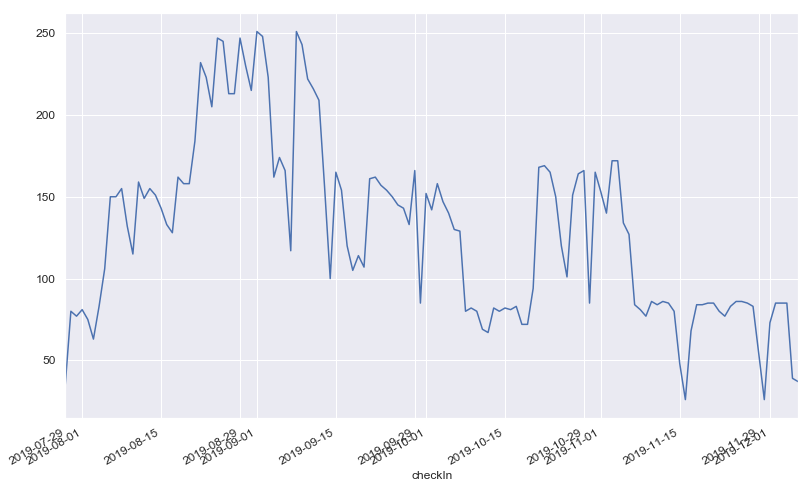

In [380]:
by_day.plot();

### Hotel Las Arenas

In [390]:
df_LasArenas = df_properties.query("propertyId==91144")
df_LasArenas.head(5)

,name,propertyId,checkIn,checkOut,stars,score,advance,netPrice,propertyType,longitude,latitude,district,weekday,month
58334,Las Arenas Balneario Resort,91144,2019-07-30,2019-07-31,5 star,9.0,7.0,297.0,Hotel,-0.3247,39.4664,Poblados marítimos,Tuesday,July
58338,Las Arenas Balneario Resort,91144,2019-07-31,2019-08-01,5 star,9.0,7.0,297.0,Hotel,-0.3247,39.4664,Poblados marítimos,Wednesday,July
58343,Las Arenas Balneario Resort,91144,2019-08-01,2019-08-02,5 star,9.0,7.0,297.0,Hotel,-0.3247,39.4664,Poblados marítimos,Thursday,August
58347,Las Arenas Balneario Resort,91144,2019-08-02,2019-08-03,5 star,9.0,7.0,297.0,Hotel,-0.3247,39.4664,Poblados marítimos,Friday,August
58354,Las Arenas Balneario Resort,91144,2019-08-04,2019-08-05,5 star,9.0,7.0,297.0,Hotel,-0.3247,39.4664,Poblados marítimos,Sunday,August


In [391]:
df_LasArenas['netPrice'].describe()

count    196.0000
mean     257.7143
std       94.8559
min      135.0000
25%      198.0000
50%      257.0000
75%      288.0000
max      851.0000
Name: netPrice, dtype: float64

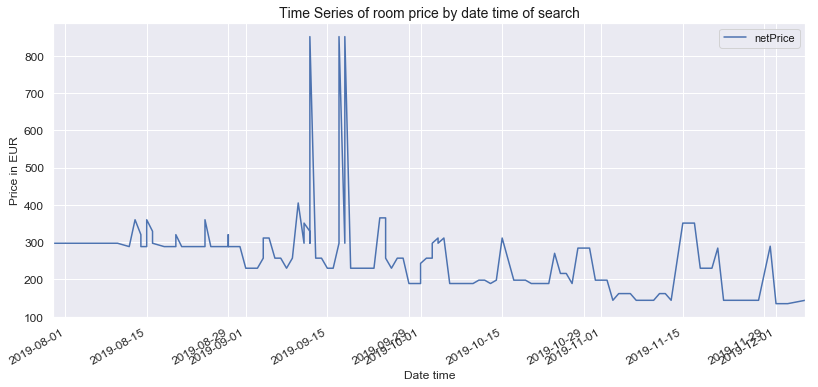

In [392]:
# Time Series Visualizations
#plt.set(xlim=(0, 900))
df_LasArenas.plot(x='checkIn', y='netPrice', figsize=(12,6))
plt.xlabel('Date time')
plt.ylabel('Price in EUR')
plt.title('Time Series of room price by date time of search');

In [393]:
df_LasArenas.netPrice.max()

851.0

In [388]:
#ff = pd.unique(df_hotels.checkIn)
#ff

numpy.ndarray

In [324]:
# Assign known district to some Hotels
hotels_df['district'].loc[(hotels_df['name']=='Sercotel Sorolla Palace')] = 'Benicalap'
hotels_df['district'].loc[(hotels_df['name']=='Silken Puerta Valencia')] = 'Camins al Grau'
hotels_df['district'].loc[(hotels_df['name']=='Tryp Valencia Feria')] = 'Benicalap'
hotels_df['district'].loc[(hotels_df['name']=='Hotel Beleret')] = 'Benicalap'
hotels_df['district'].loc[(hotels_df['name']=='You & Co. Saler Beach Boutique')] = 'El Saler'

### Weekday

In [325]:
weekday_names = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
weekday_mean = hotels_df[["weekday", "netPrice"]].groupby("weekday").mean()

In [326]:
# To be ordered by weekday
weekday_mean = weekday_mean.loc[weekday_names]
weekday_mean.netPrice

weekday
Monday       108.7545
Tuesday      116.9722
Wednesday    119.1427
Thursday     120.3052
Friday       131.4960
Saturday     135.3995
Sunday       100.8631
Name: netPrice, dtype: float32

In [327]:
weekday_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Monday to Sunday
Data columns (total 1 columns):
netPrice    7 non-null float32
dtypes: float32(1)
memory usage: 404.0+ bytes


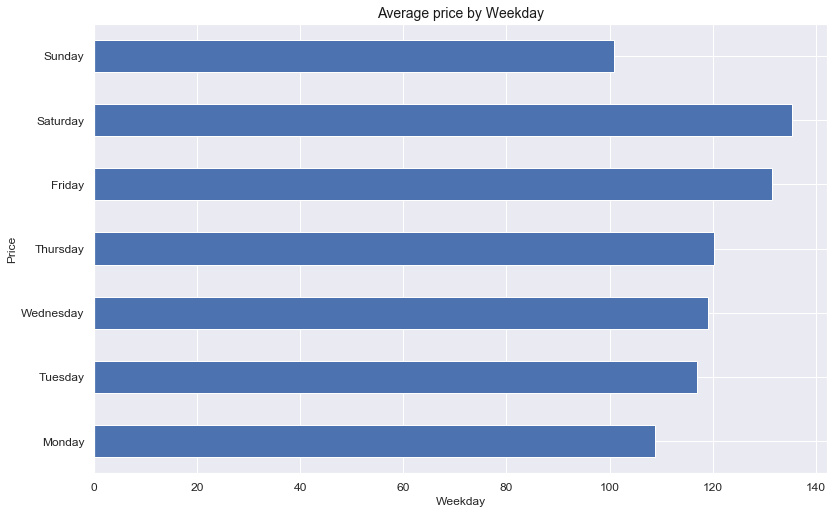

In [329]:
fig = weekday_mean.netPrice.plot(kind="barh", fig=(6,4));
#sns.barplot(y="netPrice", data=weekday_mean)
fig.set_title('Average price by Weekday')
plt.xlabel("Weekday")
plt.ylabel("Price")
plt.show(fig)
# TODO: print mean

In [330]:
month_names = ["January","February","March","April","May","June","July","August","September","October","November","December"]
month_mean = hotels_df.groupby("month").mean()
# To be ordered by weekday
month_mean = month_mean.loc[month_names]

In [331]:
month_mean

,score,advance,netPrice,longitude,latitude
month,,,,,
January,NaN,NaN,NaN,NaN,NaN
February,NaN,NaN,NaN,NaN,NaN
March,NaN,NaN,NaN,NaN,NaN
April,NaN,NaN,NaN,NaN,NaN
May,NaN,NaN,NaN,NaN,NaN
June,NaN,NaN,NaN,NaN,NaN
July,8.4596,7.0000,109.9309,-0.3674,39.4701
August,8.5016,14.2785,119.4202,-0.3681,39.4690
September,8.4950,43.2423,132.0158,-0.3668,39.4686


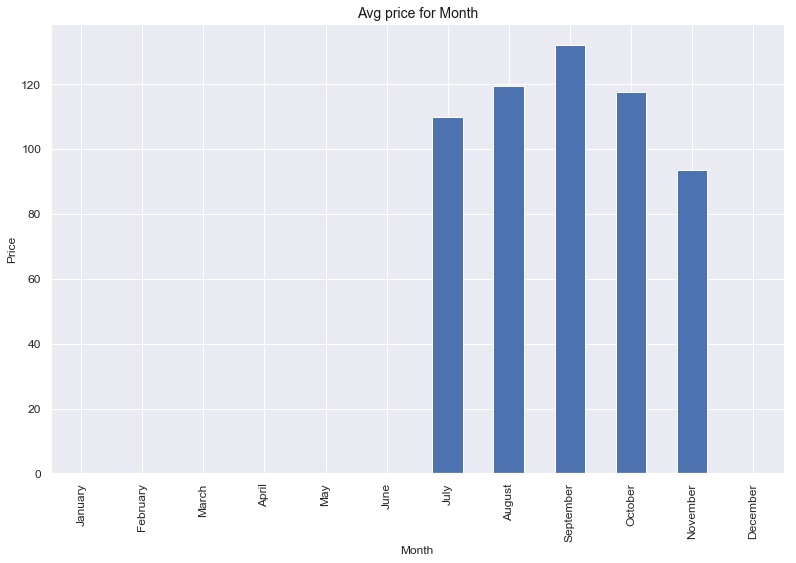

In [332]:
fig = month_mean.netPrice.plot(kind="bar", fig=(10,4));
fig.set_title('Avg price for Month')
plt.xlabel("Month")
plt.ylabel("Price")
plt.show(fig)

In [201]:
#plt.figure(figsize=(16, 6))
#fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
#fig.suptitle('Average Price', fontsize=16)
#ax2.set_title('Instances')
#ax2 = month_mean.netPrice.plot(kind="bar")
#ax1 = month_mean.netPrice.plot(kind="bar")
#plt.show()

### Stars

In [333]:
stars_df = hotels_df[["name","stars"]]
# Drop duplicates
stars_df.drop_duplicates(keep='first', inplace=True)

In [334]:
stars_df.head()

,name,stars
propertyId,,
12656,Sol Playa,2 star
13270,Melia Plaza Valencia,4 star
14441,Hotel Turia,4 star
14580,El Coso,3 star
23332,Hotel Miramar,2 star


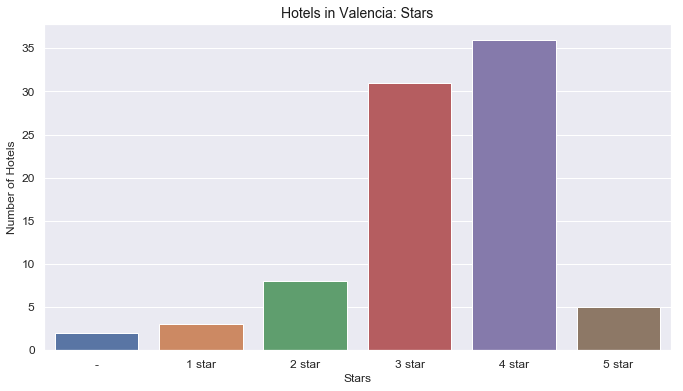

In [335]:
plt.figure(figsize=(10, 6))
fig = sns.countplot(x="stars", data=stars_df)
fig.set_title('Hotels in Valencia: Stars', fontdict={'fontsize': mpl.rcParams['axes.titlesize'],
 'fontweight': mpl.rcParams['axes.titleweight']})
plt.xlabel("Stars")
plt.ylabel("Number of Hotels");

As we can see from the visualization 4 star hotels are the most commonly ones followed by 3 star.

In [336]:
hotels_NA_stars = hotels_df.query("stars=='-'")
hotels_1_star = hotels_df.query("stars=='1 star'")
hotels_2_star = hotels_df.query("stars=='2 star'")
hotels_3_star = hotels_df.query("stars=='3 star'")
hotels_4_star = hotels_df.query("stars=='4 star'")
hotels_5_star = hotels_df.query("stars=='5 star'")

In [337]:
hotels_2_star.head()

,name,checkIn,checkOut,stars,score,advance,netPrice,propertyType,longitude,latitude,district,weekday,month
propertyId,,,,,,,,,,,,,
12656,Sol Playa,2019-07-30,2019-07-31,2 star,8.3,7.0,85.0,Hotel,-0.3238,39.4651,Poblados marítimos,Tuesday,July
12656,Sol Playa,2019-07-31,2019-08-01,2 star,8.3,7.0,85.0,Hotel,-0.3238,39.4651,Poblados marítimos,Wednesday,July
12656,Sol Playa,2019-08-01,2019-08-02,2 star,8.3,7.0,103.0,Hotel,-0.3238,39.4651,Poblados marítimos,Thursday,August
12656,Sol Playa,2019-08-04,2019-08-05,2 star,8.3,7.0,94.0,Hotel,-0.3238,39.4651,Poblados marítimos,Sunday,August
12656,Sol Playa,2019-08-08,2019-08-09,2 star,8.3,14.0,160.0,Hotel,-0.3238,39.4651,Poblados marítimos,Thursday,August


In [338]:
by_day_month = (hotels_2_star
            .groupby(['name', 'weekday'])
            .mean()
            .unstack()
           )
by_day_month

score                                    \
weekday                            Friday  Monday Saturday  Sunday Thursday   
name                                                                          
Ad Hoc Carmen                      8.9000  8.9000   8.9000  8.9000   8.9000   
Casual De La Música Valencia       7.4385  7.4294   7.4357  7.4294   7.4267   
Casual Del Cine Valencia           8.6000  8.6000   8.6000  8.6000   8.6000   
Casual Vintage Valencia            8.5000  8.5000   8.5000  8.5000   8.5000   
Hotel Miramar                         NaN  8.4000      NaN  8.4000   8.4000   
Md Design Hotel - Portal Del Real  9.1000  9.1000   9.1000  9.1000   9.1000   
Sol Playa                          8.3000  8.3000   8.3000  8.3000   8.3000   
Sweet Hotel Continental            8.3000  8.3000   8.3000  8.3000   8.3000   

                                                     advance           \
weekday                           Tuesday Wednesday   Friday   Monday   
name                                                                    
Ad Hoc Carmen                      8.9000    8.9000  23.1667  46.3846   
Casual De La Música Valencia       7.4417    7.4313  44.7692  44.2941   
Casual Del Cine Valencia           8.6000    8.6000  39.5625  42.2222   
Casual Vintage Valencia            8.5000    8.5000  37.6875  42.2222   
Hotel Miramar                      8.4000    8.4000      NaN  51.7857   
Md Design Hotel - Portal Del Real  9.1000    9.1000  39.5625  42.2222   
Sol Playa                          8.3000    8.3000  60.0000  50.1429   
Sweet Hotel Continental            8.3000    8.3000  38.2000  41.4375   

                                            ... longitude                    \
weekday                           Saturday  ...  Thursday Tuesday Wednesday   
name                                        ...                               
Ad Hoc Carmen                      37.0000  ...   -0.3762 -0.3762   -0.3762   
Casual De La Música Valencia       42.0714  ...   -0.3789 -0.3789   -0.3789   
Casual Del Cine Valencia           38.2000  ...   -0.3776 -0.3776   -0.3776   
Casual Vintage Valencia            40.2000  ...   -0.3766 -0.3766   -0.3766   
Hotel Miramar                          NaN  ...   -0.3237 -0.3237   -0.3237   
Md Design Hotel - Portal Del Real  40.7647  ...   -0.3723 -0.3723   -0.3723   
Sol Playa                          60.0000  ...   -0.3238 -0.3238   -0.3238   
Sweet Hotel Continental            39.7333  ...   -0.3746 -0.3746   -0.3746   

                                  latitude                             \
weekday                             Friday   Monday Saturday   Sunday   
name                                                                    
Ad Hoc Carmen                      39.4775  39.4775  39.4775  39.4775   
Casual De La Música Valencia       39.4700  39.4700  39.4700  39.4700   
Casual Del Cine Valencia           39.4691  39.4691  39.4691  39.4691   
Casual Vintage Valencia            39.4713  39.4713  39.4713  39.4713   
Hotel Miramar                          NaN  39.4643      NaN  39.4643   
Md Design Hotel - Portal Del Real  39.4770  39.4770  39.4770  39.4770   
Sol Playa                          39.4651  39.4651  39.4651  39.4651   
Sweet Hotel Continental            39.4698  39.4698  39.4698  39.4698   

                                                               
weekday                           Thursday  Tuesday Wednesday  
name                                                           
Ad Hoc Carmen                      39.4775  39.4775   39.4775  
Casual De La Música Valencia       39.4700  39.4700   39.4700  
Casual Del Cine Valencia           39.4691  39.4691   39.4691  
Casual Vintage Valencia            39.4713  39.4713   39.4713  
Hotel Miramar                      39.4643  39.4643   39.4643  
Md Design Hotel - Portal Del Real  39.4770  39.4770   39.4770  
Sol Playa                          39.4651  39.4651   39.4651  
Sweet Hotel Continental            39.4698  39.4

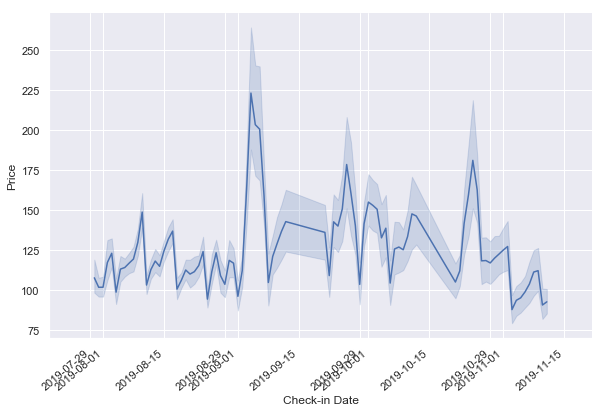

In [77]:
#Plotting the mean and the 95% confidence interval around the mean
g = sns.relplot(x="checkIn", y="netPrice", kind="line", data=df_hotels_4)
# ha: horizontal alignment
g.fig.autofmt_xdate(rotation=40, ha='right')
g.fig.set_size_inches(10, 6)
g.set_axis_labels("Check-in Date", "Price");
g.ax.margins(x=0.1, y=0.05)

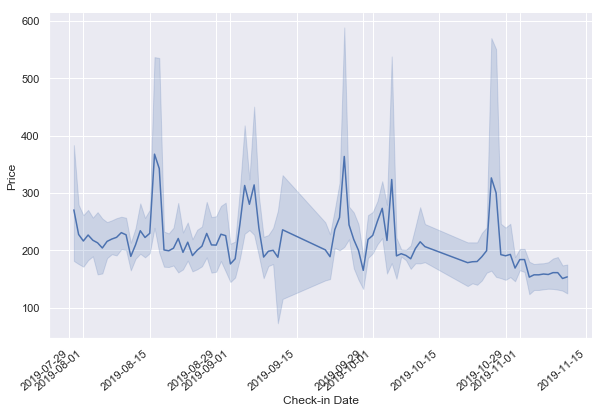

In [78]:
#Plotting the mean and the 95% confidence interval around the mean
g = sns.relplot(x="checkIn", y="netPrice", kind="line", data=df_hotels_5)
g.fig.autofmt_xdate(rotation=40, ha='right')
g.fig.set_size_inches(10, 6)
g.set_axis_labels("Check-in Date", "Price");

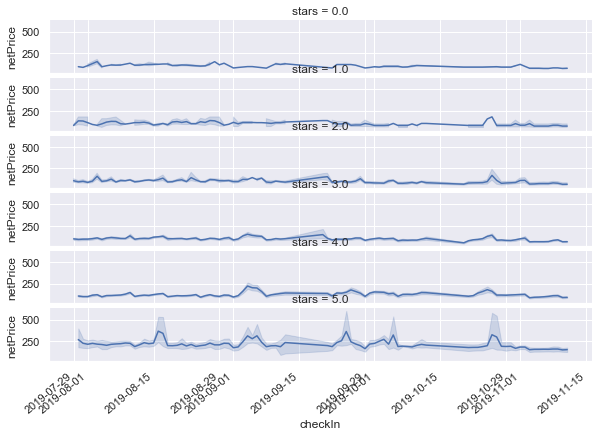

In [79]:
g = sns.relplot(x="checkIn", y="netPrice", row="stars", kind="line", data=df_hotels);
g.fig.autofmt_xdate(rotation=40, ha='right')
g.fig.set_size_inches(10, 6)

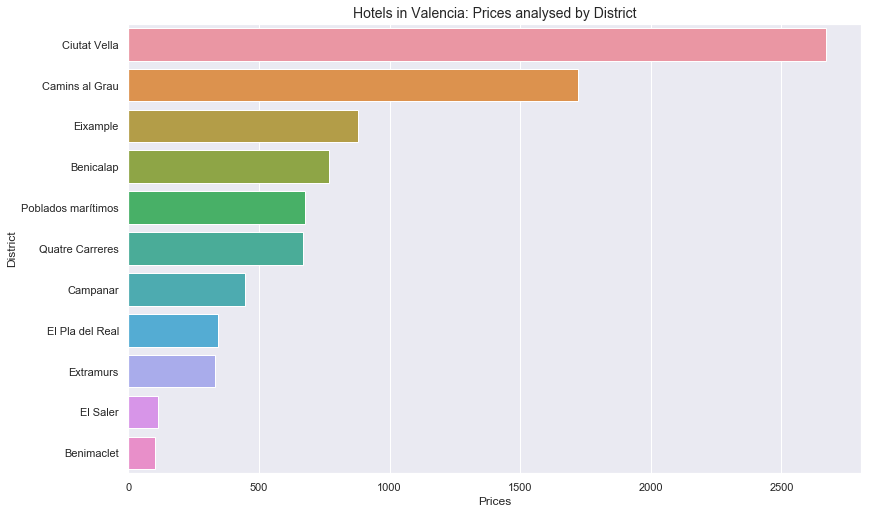

In [199]:
fig = sns.countplot(y="district", data=df_hotels, order = df_hotels['district'].value_counts().index)
fig.set_title(label='Hotels in Valencia: Prices analysed by District', \
              fontdict={'fontsize': mpl.rcParams['axes.titlesize'], 'fontweight': mpl.rcParams['axes.titleweight']})
plt.xlabel("Prices")
plt.ylabel("District")
plt.show(fig)

In [81]:
district_mean = df_hotels.groupby("district")

In [82]:
district_mean

In [200]:
# Mean price per district
district_mean = df_hotels.groupby("district").mean()
# To be ordered by district
district_mean = district_mean.loc[district_names]
district_mean

,score,advance,netPrice,longitude,latitude
district,,,,,
Algirós,NaN,NaN,NaN,NaN,NaN
Benicalap,8.2108,40.3919,95.9440,-0.4066,39.4956
Benimaclet,8.4000,41.4020,70.4706,-0.3632,39.4852
Camins al Grau,8.4568,41.4023,104.5628,-0.3499,39.4615
Campanar,8.0609,39.9888,89.4263,-0.3902,39.4804
Ciutat Vella,8.7164,40.7178,133.3885,-0.3755,39.4727
Eixample,8.6236,40.5125,128.6310,-0.3703,39.4661
El Pla del Real,8.3962,40.3265,158.0196,-0.3589,39.4730
Extramurs,8.6940,40.3444,117.8489,-0.3820,39.4699


In [84]:
#fig = sns.countplot(y="district", data=district_mean, order = district_mean['district'].value_counts().index)
#fig.set_title(label='Hotels in Valencia: Prices analysed by District', fontdict={'fontsize': mpl.rcParams['axes.titlesize'],
# 'fontweight': mpl.rcParams['axes.titleweight']})
#plt.xlabel("Prices")
#plt.ylabel("District")
#plt.show(fig)

According to the dataset, we have latitude and longitude on the dataset for each hotel. We are going to see the common location and how the hotels are placed.

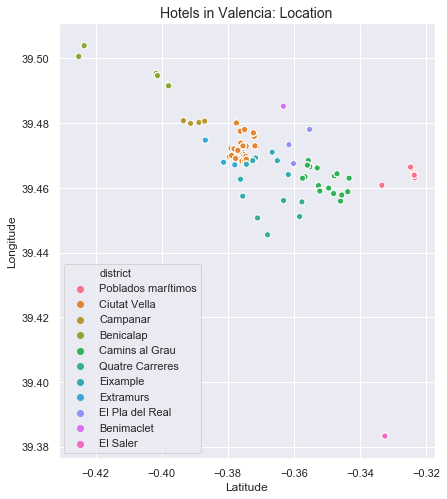

In [85]:
#df_hotels.groupby(["a", "name"]).median().index.get_level_values(1)
plt.figure(figsize=(6,8))

#fig = sns.scatterplot(x="longitude", y="latitude", hue="district", style="district", data=df_hotels);
fig = sns.scatterplot(x="longitude", y="latitude", hue="district", data=df_hotels);
fig.set_title(label='Hotels in Valencia: Location', fontdict={'fontsize': mpl.rcParams['axes.titlesize'],
 'fontweight': mpl.rcParams['axes.titleweight']})
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show(fig)

In [86]:
#plt.figure(figsize=(10,10))
#ax = sns.countplot(x="district", hue="stars", data=df_hotels)

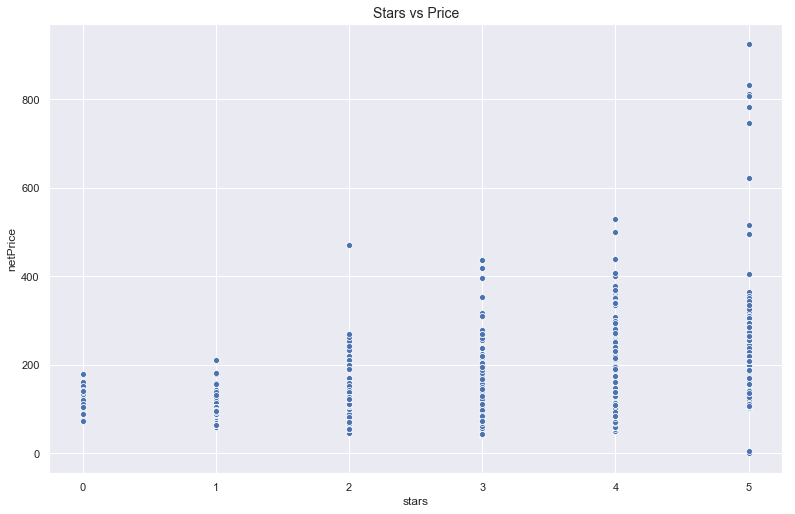

In [87]:
ax = sns.scatterplot(x="stars", y="netPrice", data=df_hotels).set_title('Stars vs Price')

In [88]:
df_hotels['checkIn'].min(), df_hotels['checkIn'].max()

(Timestamp('2019-07-29 00:00:00'), Timestamp('2019-11-11 00:00:00'))

In [89]:
df_hotels['netPrice'].min(), df_hotels['netPrice'].max()

(1.152999997138977, 924.0)

In [90]:
# Mean price per stars
stars_mean = df_hotels.groupby("stars").mean()
stars_mean

,score,advance,netPrice,longitude,latitude
stars,,,,,
0.0,9.1363,42.8493,104.4726,-0.3666,39.4671
1.0,8.0559,41.6725,103.6550,-0.3556,39.4655
2.0,8.4508,42.1372,100.5489,-0.3662,39.4709
3.0,8.4337,41.6173,102.4271,-0.3683,39.4673
4.0,8.5078,40.1447,123.2529,-0.3691,39.4698
5.0,8.8360,40.8493,217.6096,-0.3578,39.4709


In [91]:
# Mean price per month
df_hotels.groupby(df_hotels['checkIn'].dt.strftime('%B'))['netPrice'].mean().sort_values()

checkIn
November      94.7699
July         109.9309
October      119.1602
August       119.8514
September    130.9162
Name: netPrice, dtype: float32

In [92]:
df_hotels.head()

,name,checkIn,checkOut,stars,score,advance,netPrice,propertyType,longitude,latitude,district,weekday,month
propertyId,,,,,,,,,,,,,
12656,Sol Playa,2019-07-30,2019-07-31,2.0,8.3,7.0,85.0,Hotel,-0.3238,39.4651,Poblados marítimos,Tuesday,July
12656,Sol Playa,2019-07-31,2019-08-01,2.0,8.3,7.0,85.0,Hotel,-0.3238,39.4651,Poblados marítimos,Wednesday,July
12656,Sol Playa,2019-08-01,2019-08-02,2.0,8.3,7.0,103.0,Hotel,-0.3238,39.4651,Poblados marítimos,Thursday,August
12656,Sol Playa,2019-08-04,2019-08-05,2.0,8.3,7.0,94.0,Hotel,-0.3238,39.4651,Poblados marítimos,Sunday,August
12656,Sol Playa,2019-08-08,2019-08-09,2.0,8.3,14.0,160.0,Hotel,-0.3238,39.4651,Poblados marítimos,Thursday,August


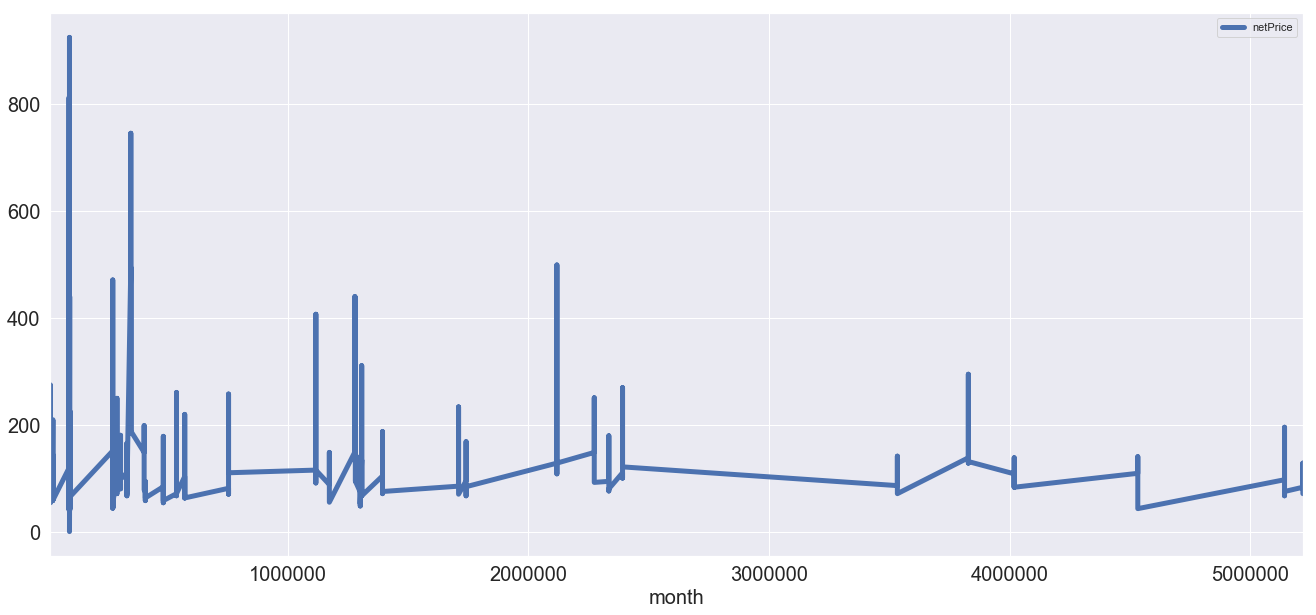

In [93]:
df_hotels[['netPrice']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('month', fontsize=20);

In [94]:
df_price = df_hotels.groupby('checkIn')['netPrice'].mean().reset_index()

In [95]:
# Indexing with Time Series Data
df_price = df_price.set_index('checkIn')
df_price.index

DatetimeIndex(['2019-07-29', '2019-07-30', '2019-07-31', '2019-08-01',
               '2019-08-02', '2019-08-03', '2019-08-04', '2019-08-05',
               '2019-08-06', '2019-08-07', '2019-08-08', '2019-08-09',
               '2019-08-10', '2019-08-11', '2019-08-12', '2019-08-13',
               '2019-08-14', '2019-08-15', '2019-08-16', '2019-08-17',
               '2019-08-18', '2019-08-19', '2019-08-20', '2019-08-21',
               '2019-08-22', '2019-08-23', '2019-08-24', '2019-08-25',
               '2019-08-26', '2019-08-27', '2019-08-28', '2019-08-29',
               '2019-08-30', '2019-08-31', '2019-09-01', '2019-09-02',
               '2019-09-03', '2019-09-04', '2019-09-05', '2019-09-06',
               '2019-09-07', '2019-09-08', '2019-09-09', '2019-09-10',
               '2019-09-11', '2019-09-12', '2019-09-20', '2019-09-21',
               '2019-09-22', '2019-09-23', '2019-09-24', '2019-09-25',
               '2019-09-26', '2019-09-27', '2019-09-28', '2019-09-29',
      

In [96]:
y = df_price['netPrice'].resample('MS').mean()

In [97]:
y

checkIn
2019-07-01    108.4554
2019-08-01    120.0574
2019-09-01    133.8054
2019-10-01    118.9088
2019-11-01     95.5096
Freq: MS, Name: netPrice, dtype: float32

In [98]:
rng = pd.date_range('1/1/2019', periods=10, freq='MS')

In [99]:
rng

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [100]:
type(rng)

pandas.core.indexes.datetimes.DatetimeIndex